In [1]:
from flash_ansr.train.train import ContrastiveLoss
from flash_ansr.eval.utils import bootstrapped_metric_ci

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


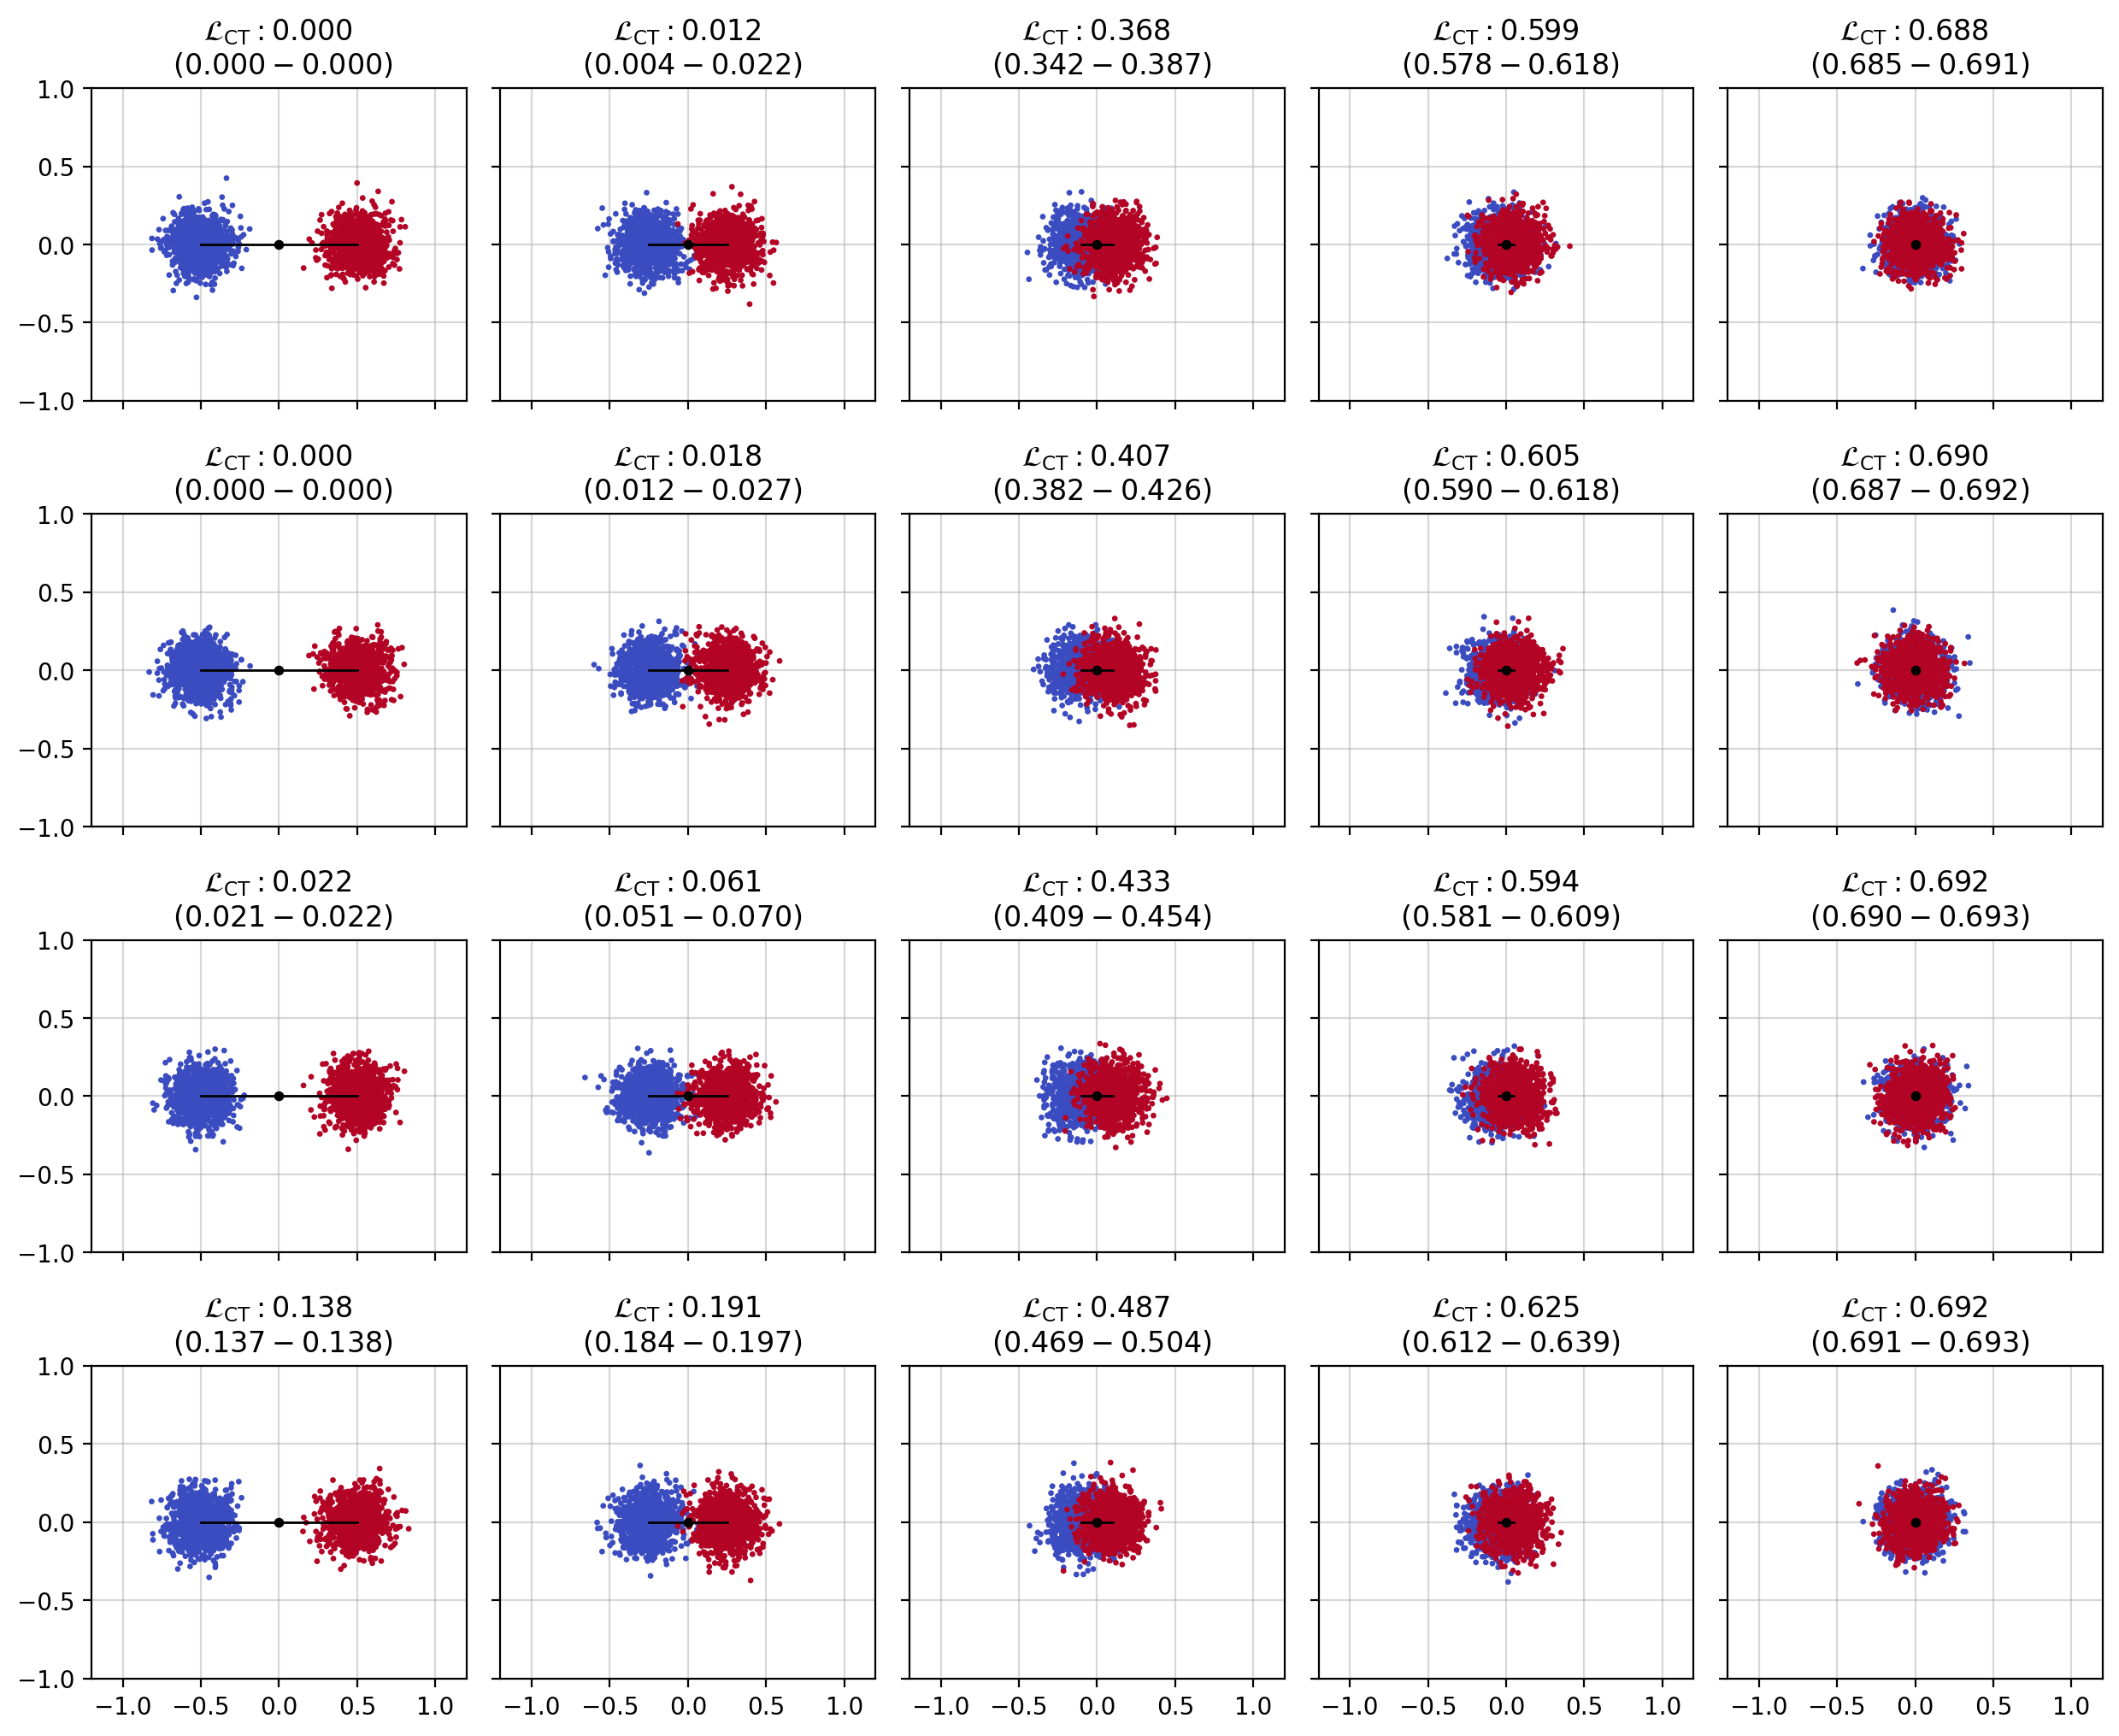

In [16]:
means = [    
    [(-0.5, 0), (0.5, 0)],
    [(-0.25, 0), (0.25, 0)],
    [(-0.1, 0), (0.1, 0)],
    [(-0.05, 0), (0.05, 0)],
    [(0, 0), (0.0, 0)],
] * 4

stds = [[(0.1, 0.1), (0.1, 0.1)]] * len(means)

margins = [0] * len(means)

temperatures = [
    0.1, 0.1, 0.1, 0.1, 0.1,
    0.2, 0.2, 0.2, 0.2, 0.2,
    0.5, 0.5, 0.5, 0.5, 0.5,
    1, 1, 1, 1, 1
]

n = 1024

COLS = min(5, len(means))
ROWS = np.ceil(len(means) / COLS).astype(int)

fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS * 2.5, ROWS * 2.5), sharex=True, sharey=True, dpi=200)

axes = np.atleast_2d(axes)

for ax, mean, std, margin, temperature in zip(tqdm(axes.flatten()), means, stds, margins, temperatures):
    # Draw lines from the origin to each mean
    for m in mean:
        ax.plot([0, m[0]], [0, m[1]], 'k-', lw=1, zorder=4)
    # Show the origin
    ax.scatter(0, 0, c='k', s=10, zorder=4)
    
    loss_fn = ContrastiveLoss(margin=margin, temperature=temperature)

    x = []
    y = []
    for i in range(len(mean)):
        x.append(np.random.normal(mean[i][0], std[i][0], n))
        y.append(np.random.normal(mean[i][1], std[i][1], n))
    
    x = np.concatenate(x)
    y = np.concatenate(y)

    labels = np.concatenate([np.zeros(n), np.ones(n)])
    embeddings = np.stack([x, y], axis=1)

    combined_data = np.concatenate([labels.reshape(-1, 1), embeddings], axis=1)

    def combined_loss_fn(combined_data):
        labels = combined_data[:, 0]
        embeddings = combined_data[:, 1:]
        return loss_fn(embeddings, labels)

    loss, loss_lower, loss_upper =  bootstrapped_metric_ci(combined_data, metric=combined_loss_fn, n=64)

    ax.scatter(x, y, c=labels, cmap='coolwarm', s=2, zorder=3)

    ax.set_title(f'$\\mathcal{{L}}_\\text{{CT}}:{loss:.3f}$ \n $({loss_lower:.3f} - {loss_upper:.3f})$')

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1, 1)

    ax.set_aspect('equal')

    ax.grid(alpha=0.5, zorder=1)

fig.tight_layout(h_pad=3)

100%|██████████| 15/15 [00:18<00:00,  1.24s/it]


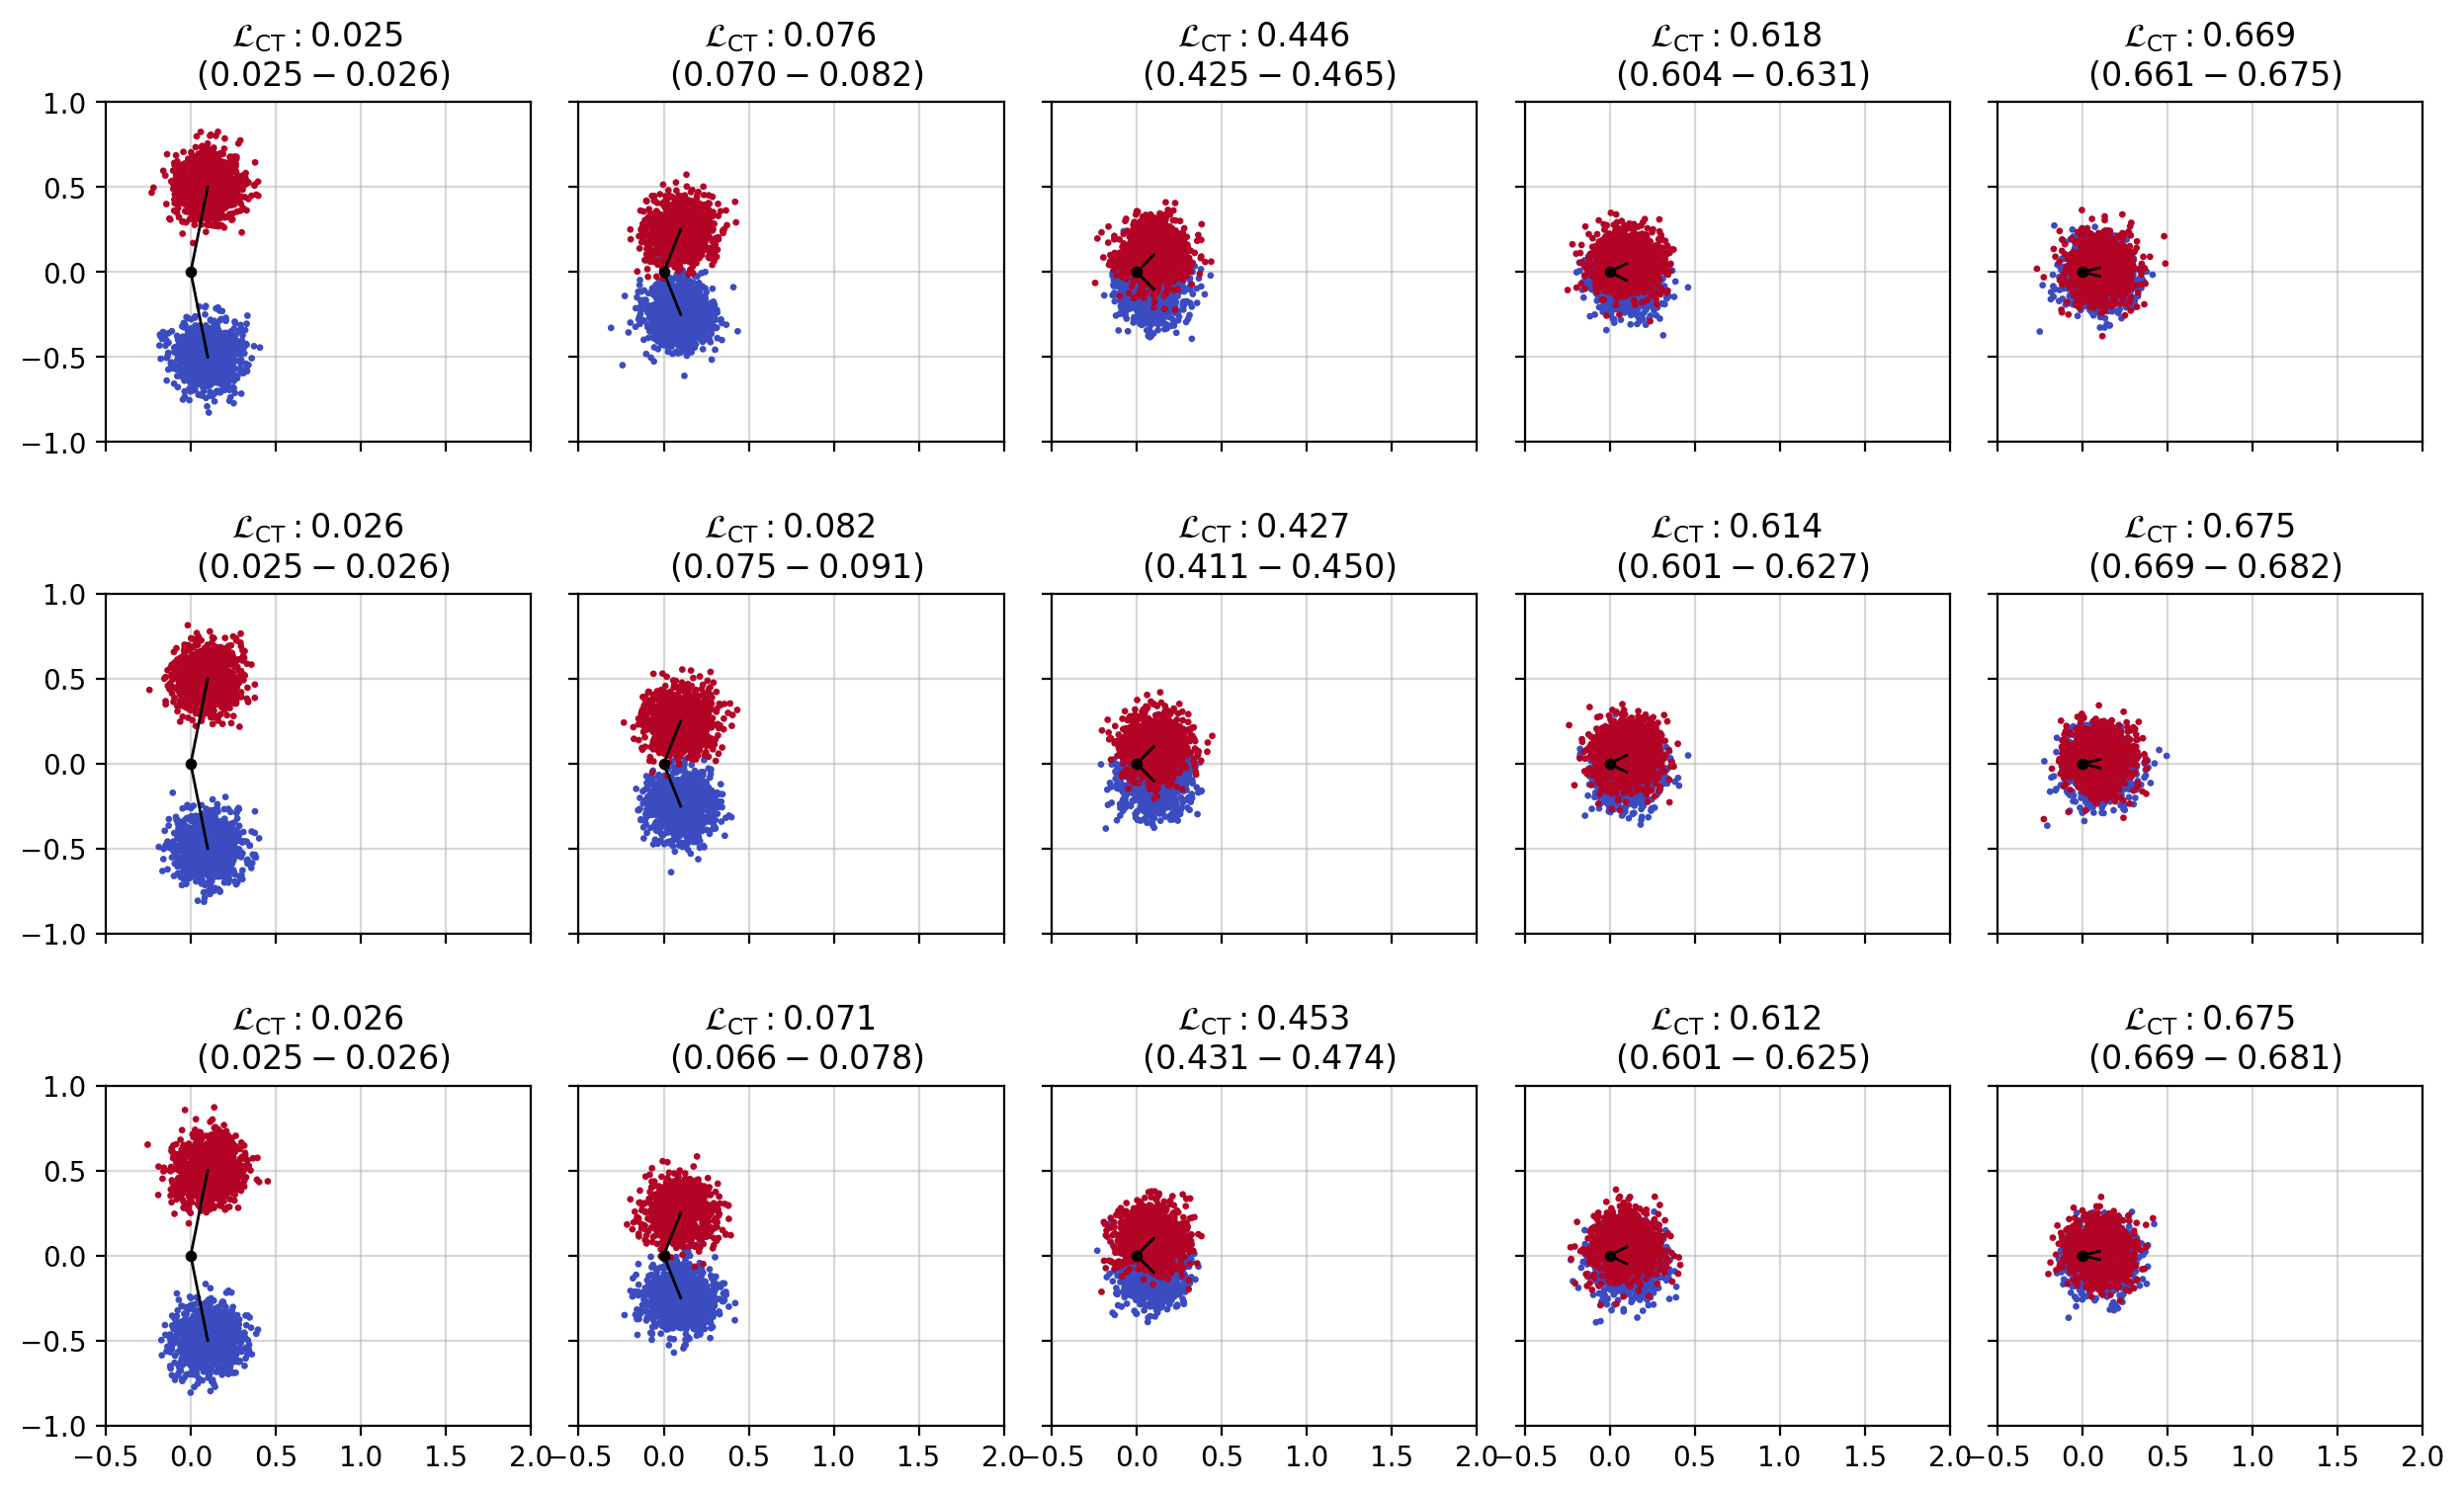

In [20]:
offset = 0.1

means = [    
    [(offset, -0.5), (offset, 0.5)],
    [(offset, -0.25), (offset, 0.25)],
    [(offset, -0.1), (offset, 0.1)],
    [(offset, -0.05), (offset, 0.05)],
    [(offset, -0.025), (offset, 0.025)],
] * 3

stds = [[(0.1, 0.1), (0.1, 0.1)]] * len(means)

margins = [
    0, 0, 0, 0, 0,
    0.5, 0.5, 0.5, 0.5, 0.5,
    1, 1, 1, 1, 1
]

temperatures = [0.5] * len(means)

n = 1024

COLS = min(5, len(means))
ROWS = np.ceil(len(means) / COLS).astype(int)

fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS * 2.5, ROWS * 2.5), sharex=True, sharey=True, dpi=200)

axes = np.atleast_2d(axes)

for ax, mean, std, margin, temperature in zip(tqdm(axes.flatten()), means, stds, margins, temperatures):
    # Draw lines from the origin to each mean
    for m in mean:
        ax.plot([0, m[0]], [0, m[1]], 'k-', lw=1, zorder=4)
    # Show the origin
    ax.scatter(0, 0, c='k', s=10, zorder=4)
    
    loss_fn = ContrastiveLoss(margin=margin, temperature=temperature)

    x = []
    y = []
    for i in range(len(mean)):
        x.append(np.random.normal(mean[i][0], std[i][0], n))
        y.append(np.random.normal(mean[i][1], std[i][1], n))
    
    x = np.concatenate(x)
    y = np.concatenate(y)

    labels = np.concatenate([np.zeros(n), np.ones(n)])
    embeddings = np.stack([x, y], axis=1)

    combined_data = np.concatenate([labels.reshape(-1, 1), embeddings], axis=1)

    def combined_loss_fn(combined_data):
        labels = combined_data[:, 0]
        embeddings = combined_data[:, 1:]
        return loss_fn(embeddings, labels)

    loss, loss_lower, loss_upper =  bootstrapped_metric_ci(combined_data, metric=combined_loss_fn, n=64)

    ax.scatter(x, y, c=labels, cmap='coolwarm', s=2, zorder=3)
    ax.set_title(f'$\\mathcal{{L}}_\\text{{CT}}:{loss:.3f}$ \n $({loss_lower:.3f} - {loss_upper:.3f})$')

    ax.set_xlim(-0.5, 2)
    ax.set_ylim(-1, 1)

    ax.set_aspect('equal')

    ax.grid(alpha=0.5, zorder=1)

fig.tight_layout(h_pad=3)